/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1256: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


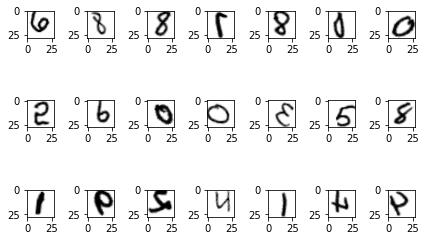

In [ ]:
#Nampoina
from torchvision import datasets,transforms
import torchvision
import torch
import random
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import torch.nn.functional as F
import PIL
import matplotlib.pyplot as plt

##########################
### SETTINGS
##########################

RANDOM_SEED = 1
BATCH_SIZE = 128
NUM_EPOCHS = 100

##########################
### MNIST DATASET
##########################

training_transforms = transforms.Compose([
    transforms.Resize(size=(32, 32)),
    transforms.RandomCrop(size=(28, 28)),
    transforms.RandomRotation(degrees=30, interpolation=PIL.Image.BILINEAR),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),
    # normalize does (x_i - mean) / std
    # if images are [0, 1], they will be [-1, 1] afterwards
])

test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.CenterCrop(size=(28, 28)),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=training_transforms,
                               download=True)


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

# Checking the dataset

random.seed(0)
torch.manual_seed(0)


for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    

img_num = 0
fig, ax = plt.subplots(3, 7)
for i in range(21):
    m = i // 7
    n = i % 7
    ax[m,n].imshow(images[i].view(28, 28).numpy(), cmap='binary')
    save_image(images, 'img'+str(img_num)+'.png')
    img_num += 1
    
plt.tight_layout()
